<center><h1>[CODE] Google Play Store Analysis With AppleStore Comparison</h1></center>

# Table of Contents:

[Part 1: Data pre-processing](#Part-1:-Data-pre-processing:)

- [Import libraries and declare necessarily functions](#PRE:-Import-necessarily-libraries-and-declare-necessarily-functions)

- [Google Play Store Dataset](#Google-Play-Store-Dataset)

- [Apple Store dataset](#Apple-Store-dataset)


[Part 2: Answer Research Questions](#Part-2:-Answer-Research-Questions:)

- [Research Question 1](#Question-1:)

    + [Between "Installs" and another factor](#Between-"Installs"-and-another-factor:)
    
    + [Between other pair of factors](#Between-other-pair-of-factors:)
- [Research Question 2](#Question-2:)

    + [Relationship between Price and Installs](#Relationship-between-Price-and-Installs:)
    
    + [Relationship between Reviews and Installs](#Relationship-between-Reviews-and-Installs:)
    
    + [Relationship between Rating and Installs, between Rating and Reviews](#Relationship-between-Rating-and-Installs,-between-Rating-and-Reviews:)
    
- [Research Question 3](#Question-3:)

- [Research Question 4](#Question-4:)


[Testing](#Testing:)

- [Data pre-processing](#Data-pre-processing-Testing:)

- [Research Question 1](#Question-1-Testing:)

- [Research Question 2](#Question-2-Testing:)

- [Research Question 3](#Question-3-Testing:)

- [Research Question 4](#Question-4-Testing:)

# Part 1: Data pre-processing:

## PRE: Import necessarily libraries and declare necessarily functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy
from sklearn.utils import shuffle

### Define a function to remove outliers

In [2]:
def remove_outlier(data, column):
    '''
    Input: Gives a DataFrame and a String represents the name of the column 
           in the DataFrame.
    Return: Returns the new DataFrame with outliers in the given column removed.
    '''
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    
    iqr = q3 - q1
    
    low_limit  = q1 - iqr * 1.5
    high_limit = q3 + iqr * 1.5
    
    return data.loc[(data[column] >= low_limit)].loc[(data[column] <= high_limit)]

### Test remove_outlier:

In [3]:
def test_remove_outlier():
    """Test the remove_outlier function.
    Throws assertion error if not pass the test!
    
    Return: 
        None
    """
    temp_list = [20 for i in range(100)]
    temp_list.extend([5, 1, 3, 100, 100])
    data = {'col1': temp_list, 'col2': [i for i in range(105)]}
    data_frame = pd.DataFrame(data)

    temp = remove_outlier(data_frame, 'col1')
    assert(len(temp) == 100)

    for element in list(temp['col1'].values):
        assert(element == 20)
    print('remove_outlier test passes!')

# Uncomment the line below to test remove_outlier
# test_remove_outlier()

### Define a function to get the confidence interval

In [4]:
def get_confidence_interval(data, confidence = 0.95):
    """Gives a list and a kwarg confidence.
    Returns the tuple of required confidence inverval.
    
    Parameters:
        data: a list containing value
        confidence: a float represents the confidence
                    interval needs, default = 0.95
    
    Return:
        a tuple: containing the lower limit of the
        interval and the higher limit of the interval
    """
    
    return scipy.stats.norm.interval(
        confidence, loc = np.mean(data), 
        scale = np.std(data))

### Test get_confidence_interval

In [5]:
def test_get_confidence_interval():
    """Test the get_confidence_interval
    """
    lst2 = [1,2,3,3,3,4,4,4,5,5,5,5,4,4,4,6,7,8,6,7,8]
    conf = get_confidence_interval(lst2, confidence = 0.95)
    
    lower_limit = conf[0]
    higher_limit = conf[1]
    
    print("List:", lst2)
    print("Confidence interval:", conf)
    print('Total number:', len(lst2))
    count = 0
    for i in lst2:
        if i >= lower_limit and i <= higher_limit:
            count += 1
    print('Total number in 95% confidence interval:', 
          count)
    print("ratio", count / len(lst2))
    
    plt.hist(lst2, bins = 7)
    plt.axvline(lower_limit, color = 'red',
                label = 'low limit')
    plt.axvline(higher_limit, color = 'yellow',
                label = 'high limit')
    plt.show()

# Uncomment the line below to test get_confidence_interval
# test_get_confidence_interval()

## Google Play Store Dataset

Read 'googleplaystore.csv' dataset file and store as a DataFrame then preprocess the dataset by:
- Remove rows that include NaN values.
- Remove rows that contains "Varies with device" in 'Size' column.
- Remove unecessary characters ('k', 'M') in the "Size" column.
- Remove the "$" sign in the "Price" column.
- Remove uneccessary characters (',' and '+') in the 'Installs' column.
- Casts all columns to type 'float'.
- Store 'Rating', 'Reviews', 'Sizes', 'Installs', 'Price' columns to pandas DataFrame as type float.

In [6]:
# Reads the Google Play Store dataset and store as DataFrame
playstore_data = pd.read_csv("googleplaystore.csv")

# Removes rows include NaN values and rows includes 
# "Varies with device" in "Size" column
playstore_data.dropna(inplace = True)
playstore_data = playstore_data[playstore_data['Size'] != 
                                'Varies with device']

# Removes unecessary characters ('k', 'M') in the "Size" column in 
# googleplaystore.csv and casts the type of that column to float
playstore_size_column = playstore_data[playstore_data.columns[4]]
playstore_size_column = playstore_size_column.str.replace(r"[kM]",'')
playstore_data[['Size']] = playstore_size_column.astype(float)

# Removes '$' sign in the "Price" column in googleplaystore.csv and 
# casts the type of that column to float
playstore_price_column = playstore_data[playstore_data.columns[7]]
playstore_price_column = playstore_price_column.str.replace(r"[$]",'')
playstore_data[['Price']] = playstore_price_column.astype(float)

# Removes uneccessary characters (',', '+') in the 'Installs' column in 
# googleplaystore.csv and casts the type of that column to float
playstore_installs_column = \
    playstore_data[playstore_data.columns[5]].str.replace(r"[,+]",'')
playstore_data[['Installs']] = playstore_installs_column.astype(float)

# Casts 'Rating' and 'Reviews' column to type float
playstore_data[['Rating']] = playstore_data[['Rating']].astype(float)
playstore_data[['Reviews']] = playstore_data[['Reviews']].astype(float)

# Store 'Rating', 'Reviews', 'Sizes', 'Installs', 'Price' columns in 
# googleplaystore.csv to pandas DataFrame as type float
playstore_rating = playstore_data[['Rating']]
playstore_reviews = playstore_data[['Reviews']]
playstore_size = playstore_data[['Size']]
playstore_installs = playstore_data[['Installs']]
playstore_price = playstore_data[['Price']]

### Test rows and NaN values GooglePlayStore
- Show that after clean the googleplaystore.csv dataset, all rows have the same columns (13) and there are no 'NaN' values in the dataset.

In [7]:
def test_rows_and_nan_playstore():
    """Test rows and NaN values 
    in Google Play Store dataset.
    Throws assertion error if fail.
    
    Return:
        None
    """
    total_columns = len(playstore_data.columns)
    assert(total_columns == 13)

    for row in playstore_data.values:
        elements = list(row)
        assert(len(elements) == total_columns)
        for element in elements:
            assert(str(element).lower() != 'nan')
    print("All rows have the same columns (13). No 'NaN' found")
    
# uncomment the line below to test rows and NaN values 
# in Google Play Store dataset

# test_rows_and_nan_playstore()

### Test numerical values GooglePlayStore
- Show that after clean the googleplaystore.csv dataset, all values in each of the following columns ("Size", "Price", "Installs", "Rating", "Reviews") are in numerical type.

In [8]:
def test_numerical_playstore():
    """test numerical values in Google
    Play Store dataset.
    Throws assertion error if fail.
    
    Return:
        None
    """
    columns = ["Size", "Price", "Installs", "Rating", "Reviews"]

    for column in columns:
        for value in playstore_data[column].values:
            if type(value) != np.float64:
                print(value, type(value))
    print("All values are numerical!")

# uncomment the line below to test numerical values 
# in Google Play Store dataset

# test_numerical_playstore()

## Apple Store dataset

Read 'AppleStore.csv' dataset file and store as a DataFrame then preprocess the dataset by:
- Remove rows that include NaN values.
- Convert the size of applications in 'size_bytes' column to MB by dividing that size to $1024^{2}$.
- Change the name of 'size_bytes' column to 'Size' and store that column to pandas DataFrame as type float.

In [9]:
# Reads the Apple Store dataset and store it as a DataFrame
appstore_data = pd.read_csv("AppleStore.csv")

# Removes rows include NaN values
appstore_data.dropna(inplace = True)

# Converts the Size in Apple Store dataset to MB
appstore_data[['size_bytes']] = \
    appstore_data[['size_bytes']].astype(float) / 1024 / 1024

# Renames the "size_bytes" column to "Size" in Apple Store dataset to 
# match Google Play Store dataset
appstore_data.columns = ['Size' if x == 'size_bytes' else x 
                         for x in appstore_data.columns]

# Store the size (coverted to MB) column in Apple Store
# dataset to pandas DataFrame as type float
appstore_size = appstore_data[['Size']]

### Test numerical values AppStore
- Show that after clean the AppleStore.csv dataset, all values in each of the following "Size" column are in numerical type.

In [10]:
def test_numerical_appstore():
    """test numerical values in Apple
    Store dataset's "Size" column.
    Throws assertion error if fail.
    
    Return:
        None
    """
    for value in appstore_data["Size"].values:
        if type(value) != np.float64:
            print(value, type(value))
    print("All values are numerical!")

# uncomment the line below to test numerical values 
# in Apple Store dataset's "Size" column

# test_numerical_appstore()

# Part 2: Answer Research Questions:

## Question 1:
Is there a strong linear correlation between the price of an application and the number of installs? Is there a strong linear correlation between rating and number of install? Is there a strong linear correlation between reviews and number of installs?

### Testing conitnuity:

#### Test continuity of "Price":

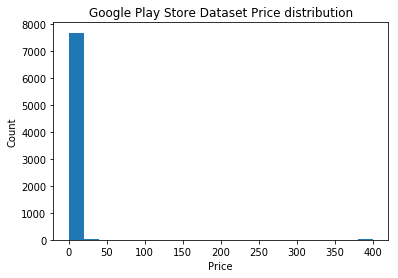

In [11]:
plt.hist(playstore_price.values.reshape(-1), 
         bins = 20)

plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Google Play Store Dataset Price distribution")

plt.show()

Conclusion: "Price" is a continuous value type.

#### Test continuity of "Reviews":

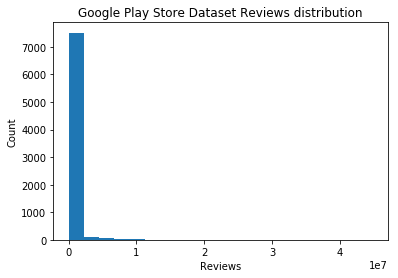

In [12]:
plt.hist(playstore_reviews.values.reshape(-1), bins = 20)

plt.xlabel("Reviews")
plt.ylabel("Count")
plt.title("Google Play Store Dataset Reviews distribution")

plt.show()

Conclusion: "Reviews" is a continuous value type.

#### Test continuity of "Size":

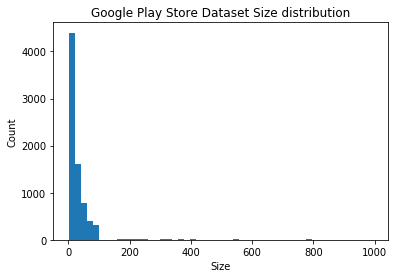

In [13]:
plt.hist(playstore_size.values, bins = 50)

plt.xlabel("Size")
plt.ylabel("Count")
plt.title("Google Play Store Dataset Size distribution")

plt.show()

Conclusion: "Size" is a continuous value type.

#### Test continuity of "Rating":

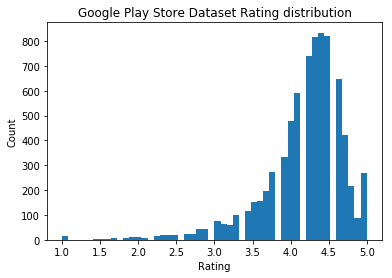

In [14]:
plt.hist(playstore_rating.values.reshape(-1), bins = 50)

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Google Play Store Dataset Rating distribution")
plt.show()

Conclusion: "Rating" is a categorical value type with normal distribution.

#### Test continuity of "Installs":

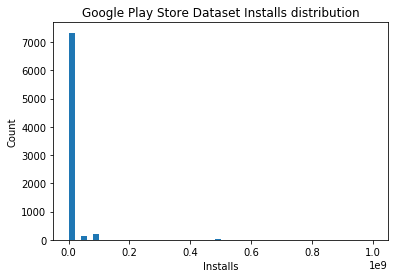

In [15]:
plt.hist(playstore_installs.values.reshape(-1), bins = 50)

plt.xlabel("Installs")
plt.ylabel("Count")
plt.title("Google Play Store Dataset Installs distribution")

plt.show()

Conclusion: "Installs" is a categorical value type.

### Between "Installs" and another factor:
Use the Spearman correlation coefficient to find the correlation between "Installs" and another factor in ("Reviews", "Rating", "Size", "Price").

#### "Reviews" and "Installs":

In [16]:
# Computes the "Spearman correlation coefficient" between 
# "Reviews" and "Installs" column in googleplaystore.csv
playstore_reviews_installs = \
    scipy.stats.spearmanr(playstore_reviews.values.reshape(-1, ), 
                          playstore_installs.values.reshape(-1, ))

# Prints the results
print("'Reviews' and 'Installs': \n" + str(playstore_reviews_installs))

'Reviews' and 'Installs': 
SpearmanrResult(correlation=0.9617752481191301, pvalue=0.0)


#### "Rating" and "Installs":

In [17]:
# Computes the "Spearman correlation coefficient" between 
# "Rating" and "Installs" column in googleplaystore.csv
playstore_rating_installs = \
    scipy.stats.spearmanr(playstore_rating.values.reshape(-1, ), 
                          playstore_installs.values.reshape(-1, ))

# Prints the results
print("'Rating' and 'Installs': \n" + str(playstore_rating_installs))

'Rating' and 'Installs': 
SpearmanrResult(correlation=0.030545300526528554, pvalue=0.007263160102855046)


#### "Size" and "Installs":

In [18]:
# Computes the "Spearman correlation coefficient" 
# between "Size" and "Installs" column in googleplaystore.csv
playstore_size_installs = \
    scipy.stats.spearmanr(playstore_size.values.reshape(-1, ), 
                          playstore_installs.values.reshape(-1, ))

# Prints the results
print("'Size' and 'Installs': \n" + str(playstore_size_installs))

'Size' and 'Installs': 
SpearmanrResult(correlation=0.29760552372159615, pvalue=9.942549611630796e-158)


#### "Price" and "Installs":

In [19]:
# Computes the "Spearman correlation coefficient"
# between "Price" and "Installs" column in googleplaystore.csv
playstore_price_installs = \
    scipy.stats.spearmanr(playstore_price.values.reshape(-1, ), 
                          playstore_installs.values.reshape(-1, ))

# Prints the results
print("'Price' and 'Installs': \n" + str(playstore_price_installs))

'Price' and 'Installs': 
SpearmanrResult(correlation=-0.2639461608266928, pvalue=2.9069171439634675e-123)


#### Draws graphs to show the result above:

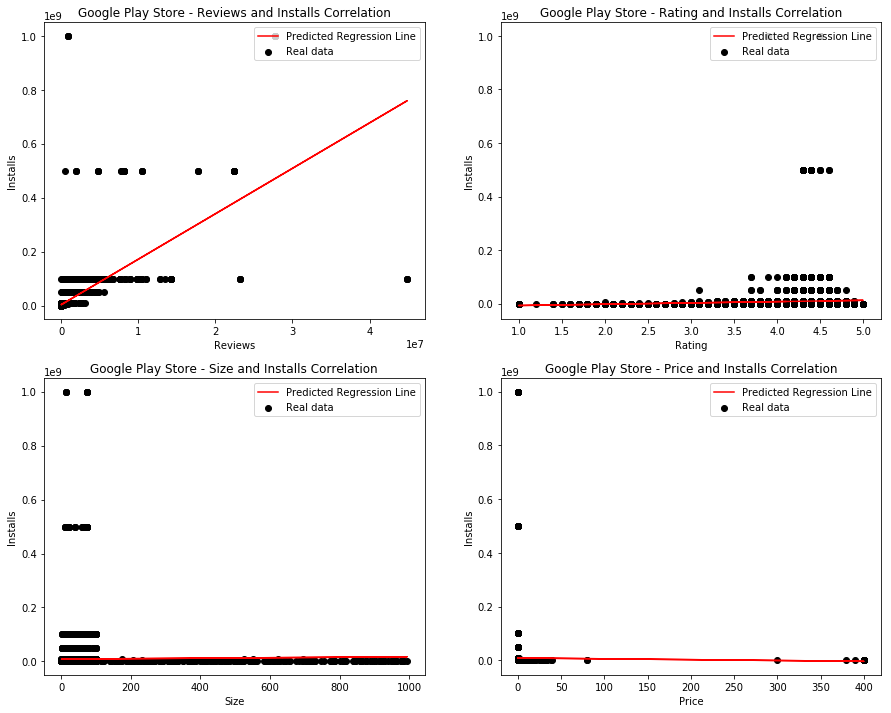

In [20]:
# Setups 4 graphs
fig, axs = plt.subplots(2, 2, sharex = False, sharey=False)
fig.set_figwidth(15)
fig.set_figheight(12)

##############################################################################
# Installs - Reviews

# Fits the regression line between Reviews and Installs
model = linear_model.LinearRegression()
model.fit(playstore_reviews, playstore_installs)

# Plots the graph with the regression line
playstore_installs_predict = model.predict(playstore_reviews)
axs[0][0].scatter(playstore_reviews, playstore_installs, 
                  color = 'black', label = 'Real data')
axs[0][0].plot(playstore_reviews, playstore_installs_predict, 
               color = 'red', label = 'Predicted Regression Line')

# Labels the graph
axs[0][0].legend(loc=1)
axs[0][0].set_xlabel('Reviews')
axs[0][0].set_ylabel('Installs')
axs[0][0].set_title('Google Play Store - Reviews and Installs Correlation')

##############################################################################
# Installs - Rating

# Fits the regression line between Reviews and Installs
model = linear_model.LinearRegression()
model.fit(playstore_rating, playstore_installs)

# Plots the graph with the regression line
playstore_installs_predict = model.predict(playstore_rating)
axs[0][1].scatter(playstore_rating, playstore_installs, 
                  color = 'black', label = 'Real data')
axs[0][1].plot(playstore_rating, playstore_installs_predict, 
               color = 'red', label = 'Predicted Regression Line')

# Labels the graph
axs[0][1].legend(loc=1)
axs[0][1].set_xlabel('Rating')
axs[0][1].set_ylabel('Installs')
axs[0][1].set_title('Google Play Store - Rating and Installs Correlation')

##############################################################################
# Installs - Size

# Fits the regression line between Size and Installs
model = linear_model.LinearRegression()
model.fit(playstore_size, playstore_installs)

# Plots the graph with the regression line
playstore_installs_predict = model.predict(playstore_size)
axs[1][0].scatter(playstore_size, playstore_installs, 
                  color = 'black', label = 'Real data')
axs[1][0].plot(playstore_size, playstore_installs_predict, 
               color = 'red', label = 'Predicted Regression Line')

# Labels the graph
axs[1][0].legend(loc=1)
axs[1][0].set_xlabel('Size')
axs[1][0].set_ylabel('Installs')
axs[1][0].set_title('Google Play Store - Size and Installs Correlation')

##############################################################################
# Installs - Price

# Fits the regression line between Price and Installs
model = linear_model.LinearRegression()
model.fit(playstore_price, playstore_installs)

# Plots the graph with the regression line
playstore_installs_predict = model.predict(playstore_price)
axs[1][1].scatter(playstore_price, playstore_installs, 
                  color = 'black', label = 'Real data')
axs[1][1].plot(playstore_price, playstore_installs_predict, 
               color = 'red', label = 'Predicted Regression Line')

# Labels and shows the graph
axs[1][1].legend(loc=1)
axs[1][1].set_xlabel('Price')
axs[1][1].set_ylabel('Installs')
axs[1][1].set_title('Google Play Store - Price and Installs Correlation')
##############################################################################

# Shows the graphs
plt.show()

#### Result:
- "Reviews" and "Installs": Even though the Spearman Correlation Coefficient gives a high result (about 0.96 with p_value near 0.0), because the graph of "Reviews" and "Installs" does not clearly show that relationship and the Spearman Correlation Coefficient is just a rank correlation, we could not give any conclusion about the correlation of "Reviews" and "Installs" at this time rather than they have a postive correlation.
            
- "Rating" and "Installs": The Spearman Correlation Coefficient gives a low result (about 0.03 with p_value near 0.007) and the graph also shows they do not have strong correlation but they could have positive relationship to other.
        
- "Size" and "Installs": The Spearman Correlation Coefficient gives a low result (about 0.2976 with p_value near 0.0) and the graph also shows they do not have strong correlation but they could have positive relationship to other.
        
- "Price" and "Installs": The Spearman Correlation Coefficient gives a low result (about -0.2639 with p_value near 0.0) and the graph also shows they do not have strong correlation but they could have negative relationship to other.

### Between other pair of factors:
Use the Pearson correlation coefficient to find the correlation between the pairs following:

#### "Price" and "Reviews":

In [21]:
# Computes the Pearson correlation Coefficient between Price and Reviews:
pearson_value = \
    scipy.stats.pearsonr(playstore_price.values.reshape(-1, ), 
                         playstore_reviews.values.reshape(-1, ))

# Prints the results:
print("Price and Reviews Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0][:-1])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1])

Price and Reviews Pearson correlation coefficient: -0.01018372992773056
p value:  0.3708776268101188


#### "Price" and "Rating":

In [22]:
# Computes the Pearson correlation Coefficient between Price and Rating:
pearson_value = \
    scipy.stats.pearsonr(playstore_price.values.reshape(-1, ), 
                         playstore_rating.values.reshape(-1, ))

# Prints the results:
print("Price and Rating Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1])

Price and Rating Pearson correlation coefficient: -0.021320384654006957
p value:  0.060991388927049264


#### "Price" and "Size":

In [23]:
# Computes the Pearson correlation Coefficient between Price and Size:
pearson_value = \
    scipy.stats.pearsonr(playstore_price.values.reshape(-1, ), 
                         playstore_size.values.reshape(-1, ))

# Prints the results:
print("Price and Reviews Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1])

Price and Reviews Pearson correlation coefficient: 0.018479614575164942
p value:  0.1044024009424755


#### "Rating" and "Reviews":

In [24]:
# Computes the Pearson correlation Coefficient between Rating and Reviews:
pearson_value = \
    scipy.stats.pearsonr(playstore_rating.values.reshape(-1, ), 
                         playstore_reviews.values.reshape(-1, ))

# Prints the results:
print("Rating and Reviews Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1])

Rating and Reviews Pearson correlation coefficient: 0.07981942133901998
p value:  2.1459886382202993e-12


#### "Rating" and "Size":

In [25]:
# Computes the Pearson correlation Coefficient between Rating and Size:
pearson_value = \
    scipy.stats.pearsonr(playstore_rating.values.reshape(-1, ), 
                         playstore_size.values.reshape(-1, ))

# Prints the results:
print("Rating and Size Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1]);

Rating and Size Pearson correlation coefficient: -0.018902881410443415
p value:  0.09669816696223194


#### "Reviews" and "Size":

In [26]:
# Computes the Pearson correlation Coefficient between Reviews and Size:
pearson_value = \
    scipy.stats.pearsonr(playstore_reviews.values.reshape(-1, ), 
                         playstore_size.values.reshape(-1, ))

# Prints the results:
print("Reviews and Size Pearson correlation coefficient: " 
      + str(pearson_value)[1:].split(",")[0])
print("p value: " + str(pearson_value)[1:].split(",")[1][:-1]);

Reviews and Size Pearson correlation coefficient: 0.036540250274611406
p value:  0.001319374549948722


#### Plots the graphs to show the correlations above:

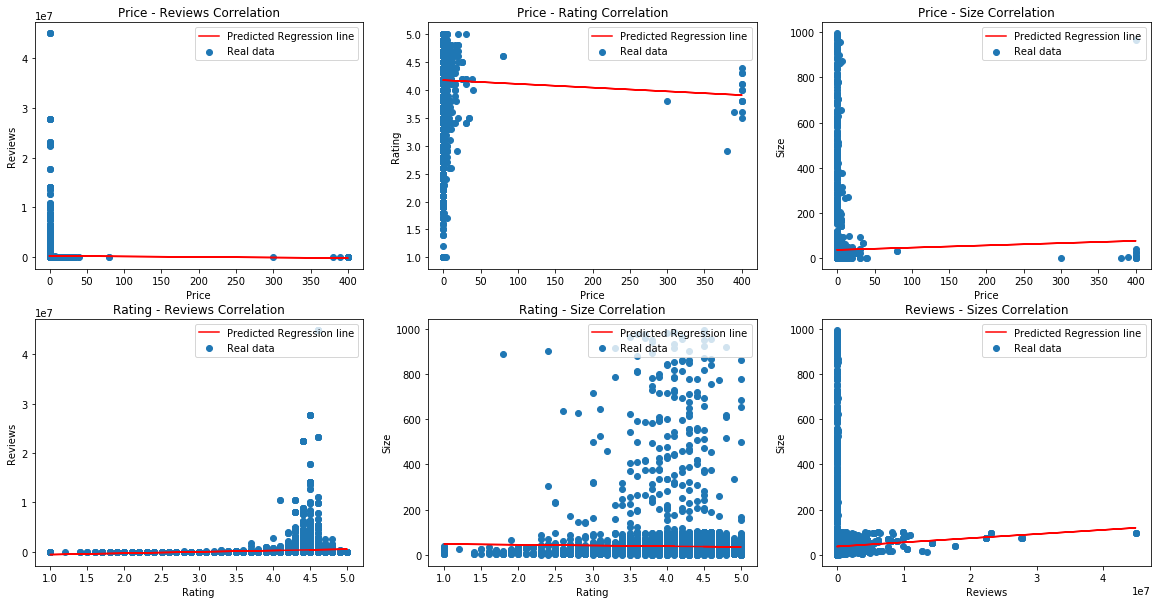

In [27]:
# Setups 6 graphs
fig, axs = plt.subplots(2, 3, sharex = False, sharey=False)
fig.set_figwidth(20)
fig.set_figheight(10)

##############################################################################
# Price - Reviews

# Fits the regression line between Price and Reviews
model = linear_model.LinearRegression()
model.fit(playstore_price, playstore_reviews)
predict = model.predict(playstore_price)

# Draws and labels Price - Reviews graph with the regression line
axs[0][0].scatter(playstore_price.values.reshape(-1, ), 
                  playstore_reviews.values.reshape(-1, ),
                  label = 'Real data')
axs[0][0].plot(playstore_price, predict, color = 'red',
               label = 'Predicted Regression line')
axs[0][0].legend(loc=1)
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Reviews')
axs[0][0].set_title('Price - Reviews Correlation')

##############################################################################
# Price - Rating

# Fits the regression line between Price and Rating
model = linear_model.LinearRegression()
model.fit(playstore_price, playstore_rating)
predict = model.predict(playstore_price)

# Draws and labels Price - Rating graph
axs[0][1].scatter(playstore_price.values.reshape(-1, ), 
                  playstore_rating.values.reshape(-1, ),
                  label = 'Real data')
axs[0][1].plot(playstore_price, predict, color = 'red',
               label = 'Predicted Regression line')
axs[0][1].legend(loc=1)
axs[0][1].set_xlabel('Price')
axs[0][1].set_ylabel('Rating')
axs[0][1].set_title('Price - Rating Correlation')

##############################################################################
# Price - Size

# Fits the regression line between Price and Size
model = linear_model.LinearRegression()
model.fit(playstore_price, playstore_size)
predict = model.predict(playstore_price)

# Draws and labels Price - Size graph
axs[0][2].scatter(playstore_price.values.reshape(-1, ), 
                  playstore_size.values.reshape(-1, ),
                  label = 'Real data')
axs[0][2].plot(playstore_price, predict, color = 'red', 
               label = 'Predicted Regression line')
axs[0][2].legend(loc=1)
axs[0][2].set_xlabel('Price')
axs[0][2].set_ylabel('Size')
axs[0][2].set_title('Price - Size Correlation')

##############################################################################
# Rating - Reviews

# Fits the regression line between Rating and Reviews
model = linear_model.LinearRegression()
model.fit(playstore_rating, playstore_reviews)
predict = model.predict(playstore_rating)

# Draws and labels Rating - Reviews graph
axs[1][0].scatter(playstore_rating.values.reshape(-1, ), 
                  playstore_reviews.values.reshape(-1, ),
                  label = 'Real data')
axs[1][0].plot(playstore_rating, predict, color = 'red', 
               label = 'Predicted Regression line')
axs[1][0].legend(loc=1)
axs[1][0].set_xlabel('Rating')
axs[1][0].set_ylabel('Reviews')
axs[1][0].set_title('Rating - Reviews Correlation')

##############################################################################
# Rating - Size

# Fits the regression line between Rating and Size
model = linear_model.LinearRegression()
model.fit(playstore_rating, playstore_size)
predict = model.predict(playstore_rating)

# Draws and labels Rating - Size graph
axs[1][1].scatter(playstore_rating.values.reshape(-1, ), 
                  playstore_size.values.reshape(-1, ),
                  label = 'Real data')
axs[1][1].plot(playstore_rating, predict, color = 'red', 
               label = 'Predicted Regression line')
axs[1][1].legend(loc=1)
axs[1][1].set_xlabel('Rating')
axs[1][1].set_ylabel('Size')
axs[1][1].set_title('Rating - Size Correlation')

##############################################################################
# Reviews - Size

# Fits the regression line between Reviews and Size
model = linear_model.LinearRegression()
model.fit(playstore_reviews, playstore_size)
predict = model.predict(playstore_reviews)

# Draws and labels Reviews - Size graph
axs[1][2].scatter(playstore_reviews.values.reshape(-1, ), 
                  playstore_size.values.reshape(-1, ),
                  label = 'Real data')
axs[1][2].plot(playstore_reviews, predict, color = 'red', 
               label = 'Predicted Regression line')
axs[1][2].legend(loc=1)
axs[1][2].set_xlabel('Reviews')
axs[1][2].set_ylabel('Size')
axs[1][2].set_title('Reviews - Sizes Correlation')

# Shows the graphs
plt.show()

#### Result:
- "Price" and "Reviews": Even though between 'Price' and 'Reviews' there is a result of Pearson's correlation coefficient is about -0.01, the p-value of that result is about $0.37$. Therefore, we cannot give a conclusion for this by the result above.
            
- "Price" and "Rating": Between 'Price' and 'Rating' there is a result of Pearson's correlation coefficient is about -0.02 with p-value near $0.06$ (slightly over 0.05), which shows that they do not have strong correlation. However, based on the result and the graph, we can recognize that 'Price' and 'Rating' may have a negative relationship.
            
- "Price" and "Size": Even though between 'Price' and 'Size' there is a result of Pearson's correlation coefficient is about 0.01, the p-value of that result is about 0.1, which is higher than 0.05. Therefore, we cannot give a conclusion for this by the result above.
            
- "Rating" and "Reviews": The Pearson Correlation Coefficient gives a low result (about 0.08 with p_value near $2.14^{-12}$) and the graph also shows they do not have strong correlation but they could have positive relationship to other.
            
- "Rating" and "Size": Even though between 'Rating' and 'Size' there is a result of Pearson's correlation coefficient is about -0.02, the p-value of that result is about 0.09, which is higher than 0.05. Therefore, we cannot give a conclusion for this by the result above.
            
- "Reviews" and "Size": The Pearson Correlation Coefficient gives a low result (about 0.04 with p_value near 0.001) and the graph also shows they do not have strong correlation but they could have positive relationship to other.

## Question 2:
If there is no strong correlation between these factors, are there any better relationships between these factors?

### Relationship between Price and Installs:

- Get the log of "Installs"

In [28]:
# Computes and stores log of "Installs"
playstore_installs_log = np.log(playstore_installs)

- Compute the Pearson correlation coefficient between "Price" and log("Installs")

In [29]:
# Computes the Pearson correlation Coefficient between Price and log(Installs):
pearson_result = scipy.stats.pearsonr(playstore_price.values.reshape(-1, ), 
    playstore_installs_log.values.reshape(-1, ))

# Prints the results:
print("Price and log(Installs) Pearson correlation "
      + "\ncoefficient: " + str(pearson_result)[1:].split(",")[0])
print("p value: " + str(pearson_result)[1:].split(",")[1][:-1])

Price and log(Installs) Pearson correlation 
coefficient: -0.058870809438751226
p value:  2.2517427941989838e-07


#### Draws the graph to show the relationship between Price and Installs

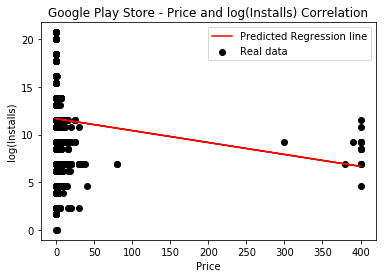

In [30]:
# Fits the regression line between Price and log(Installs)
model = linear_model.LinearRegression()
model.fit(playstore_price, playstore_installs_log)

# Plots the graph with the regression line
playstore_installs_log_predict = model.predict(playstore_price)
plt.scatter(playstore_price, playstore_installs_log, 
            color = 'black', label = 'Real data')
plt.plot(playstore_price, playstore_installs_log_predict, 
         color = 'red', label = 'Predicted Regression line')

# Labels and shows the graph
plt.legend()
plt.xlabel('Price')
plt.ylabel('log(Installs)')
plt.title('Google Play Store - Price and log(Installs) Correlation')
plt.show()

#### Result:
We are currently not able to give a specific conclusion about the relationship bewteen these 2 factors rather than recognizing that they have a slightly negative relationship.

### Relationship between Reviews and Installs:

- Computes and stores the log of Reviews

In [31]:
# Computes and stores the log of Reviews
playstore_reviews_log = np.log(playstore_reviews)

- Computes the Pearson correlation Coefficient between log(Reviews) and log(Installs):

In [32]:
# Computes the Pearson correlation Coefficient between 
# log(Reviews) and log(Installs):
pearson_result = scipy.stats.pearsonr(
    playstore_reviews_log.values.reshape(-1, ), 
    playstore_installs_log.values.reshape(-1, ))

# Prints the results:
print("log(Reviews) and log(Installs) Pearson "
      + "\ncorrelation coefficient: " 
      + str(pearson_result)[1:].split(",")[0])
print("p value: " + str(pearson_result)[1:].split(",")[1][:-1])

log(Reviews) and log(Installs) Pearson 
correlation coefficient: 0.9544923203249438
p value:  0.0


#### Draws the graph to show the relationship between Reviews and Installs

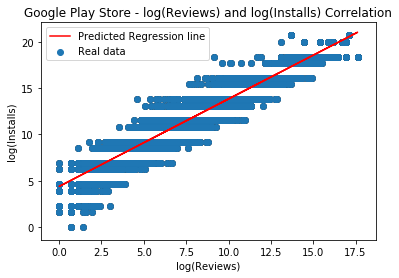

In [33]:
# Fits the regression line between log(Reviews) and log(Installs)
model = linear_model.LinearRegression()
model.fit(playstore_reviews_log, playstore_installs_log)

# Plots the graph with the regression line
playstore_installs_log_predict = model.predict(playstore_reviews_log)
plt.scatter(playstore_reviews_log, playstore_installs_log, color = 'black')
plt.plot(playstore_reviews_log, playstore_installs_log_predict, 
         color = 'red', label = 'Predicted Regression line')

plt.scatter(playstore_reviews_log.values.reshape(-1, ), 
            playstore_installs_log.values.reshape(-1, ), label = 'Real data')

# Labels and shows the graph
plt.legend()
plt.xlabel('log(Reviews)')
plt.ylabel('log(Installs)')
plt.title('Google Play Store - log(Reviews) and log(Installs) Correlation')
plt.show()

#### Result:
"Reviews" and "Installs" have a relationship that log(Reviews) and log(Installs) are correlated.

### Relationship between Rating and Installs, between Rating and Reviews:

- Group 'Rating' rows in the dataset with the mean of other numerical rows by the mean of the value in each column corresponding to the value in "Rating" column.

In [34]:
# Groups the numerical columns in the googleplaystore.csv 
# dataset (Reviews, Size, Installs, Price) by the mean of each
# value in each column that corresponding to the value in "Rating" column
playstore_group_mean_by_rating = playstore_data.groupby('Rating').mean()

- Gets the rows that need to compare (Reviews, Installs), computes log of these colunmns' values and gets the values of the "Rating" after grouped.

In [35]:
# gets the values of log of mean of "Installs" 
# grouped by "Rating"
playstore_group_mean_by_rating_installs_log = \
    np.log(playstore_group_mean_by_rating['Installs'].values)

# gets the values of log of mean of "Reviews" grouped by "Rating"
playstore_group_mean_by_rating_reviews_log = \
    np.log(playstore_group_mean_by_rating['Reviews'].values)

# gets the values of the grouped "Rating" values
playstore_group_rating = playstore_group_mean_by_rating.index.values

- Computes the Pearson correlation coefficient between grouped "Rating" and log(mean "Installs" grouped by "Rating"):

In [36]:
# Computes the Pearson correlation Coefficient between 
# log(mean Installs grouped by Rating) and (grouped "Rating"):
pearson_result = scipy.stats.pearsonr(playstore_group_rating.reshape(-1, ), 
    playstore_group_mean_by_rating_installs_log.reshape(-1, ))

# Prints the results:
print("log(mean 'Installs' grouped by 'Rating') and \
'Rating' \nPearson correlation coefficient: " 
      + str(pearson_result)[1:].split(",")[0])
print("p value: " + str(pearson_result)[1:].split(",")[1][:-1])

log(mean 'Installs' grouped by 'Rating') and 'Rating' 
Pearson correlation coefficient: 0.7019397496030098
p value:  6.380773895356904e-07


- Computes the Pearson correlation coefficient between log(mean Reviews grouped by Rating) and (grouped "Rating"):

In [37]:
# Computes the Pearson correlation Coefficient between 
# log(mean Reviews grouped by Rating) and (grouped "Rating"):
pearson_result = scipy.stats.pearsonr(playstore_group_rating.reshape(-1, ), 
    playstore_group_mean_by_rating_reviews_log.reshape(-1, ))

# Prints the results:
print("log(mean 'Reviews' grouped by 'Rating') and \
'Rating' \nPearson correlation coefficient: " 
    + str(pearson_result)[1:].split(",")[0])
print("p value: " + str(pearson_result)[1:].split(",")[1][:-1])

log(mean 'Reviews' grouped by 'Rating') and 'Rating' 
Pearson correlation coefficient: 0.7888686449713184
p value:  2.445124510019215e-09


#### Draws graphs to show these results:

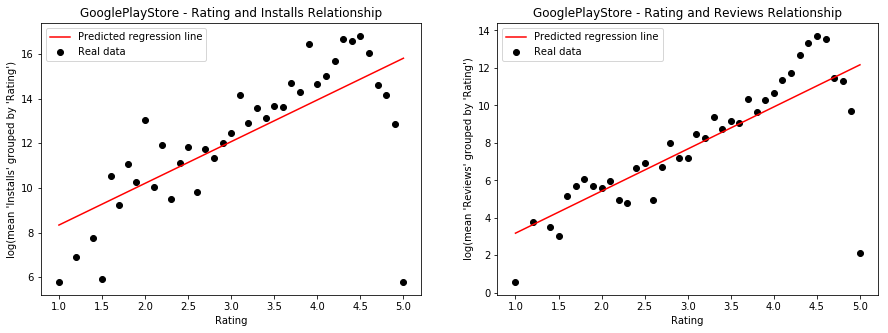

In [38]:
# Setups 2 graphs
fig, axs = plt.subplots(1, 2, sharex = False, sharey=False)
fig.set_figwidth(15)
fig.set_figheight(5)

##############################################################################
# log(mean 'Installs' grouped by 'Rating') and (grouped 'Rating')

# Fits the Linear Regression Line between 
# log(mean 'Installs' grouped by 'Rating') and (grouped 'Rating')
model = linear_model.LinearRegression()

model.fit(playstore_group_rating.reshape(-1, 1), 
          playstore_group_mean_by_rating_installs_log.reshape(-1, 1))

log_mean_installs_predict = model.predict(playstore_group_rating.reshape(-1, 1))

# Draws the scatter and the plot of the regression line
axs[0].scatter(playstore_group_rating.reshape(-1, 1), 
               playstore_group_mean_by_rating_installs_log.reshape(-1, 1), 
               color = 'black', label = 'Real data')
axs[0].plot(playstore_group_rating.reshape(-1, 1), 
            log_mean_installs_predict.reshape(-1, 1), color = 'red',
            label = 'Predicted regression line')

# Labels the graph
axs[0].legend()
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("log(mean 'Installs' grouped by 'Rating')")
axs[0].set_title("GooglePlayStore - Rating and Installs Relationship")

##############################################################################
# log(mean 'Installs' grouped by 'Rating') and (grouped 'Rating')

# Fits the Linear Regression Line between 
# log(mean 'Installs' grouped by 'Rating') and (grouped 'Rating')
model = linear_model.LinearRegression()
model.fit(playstore_group_rating.reshape(-1, 1), 
          playstore_group_mean_by_rating_reviews_log.reshape(-1, 1))

log_mean_reviews_predict = model.predict(playstore_group_rating.reshape(-1, 1))

# Draws the scatter and the plot of the regression line
axs[1].scatter(playstore_group_rating.reshape(-1, 1), 
               playstore_group_mean_by_rating_reviews_log.reshape(-1, 1), 
               color = 'black', label = 'Real data')
axs[1].plot(playstore_group_rating.reshape(-1, 1), 
            log_mean_reviews_predict.reshape(-1, 1), color = 'red', 
            label = 'Predicted regression line')

# Labels the graph
axs[1].legend()
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("log(mean 'Reviews' grouped by 'Rating')")
axs[1].set_title("GooglePlayStore - Rating and Reviews Relationship")

##############################################################################
# Shows the graphs
plt.show()

#### Result:

- "Rating" and "Installs" have an exponential relationship because when we group "Installs" by "Rating" (get the mean) then take log of that, there is a strong correlation between that value and "Rating" with a high result of Pearson Correlation Coefficient (about 0.7 with p_value near  $6.3^{−7}$ )

- "Rating" and "Reviews" have an exponential relationship because when we group "Reviews" by "Rating" (get the mean) then take log of that, there is a strong correlation between that value and "Rating" with a high result of Pearson Correlation Coefficient (about 0.8 with p_value near  $2.4^{−9}$ )

## Question 3:
Is the difference between the mean size of applications in Google Play Store dataset and size of applications in Appstore dataset is statistically significant?

- Store the "Size" column with outliers removed in Google Play Store and Apple Store datasets as DataFrame

In [39]:
# Removes outliers in "Size" column in the 2 datasets
playstore_data_remove_size_outliers = remove_outlier(playstore_data, "Size")
appstore_data_remove_size_outliers = remove_outlier(appstore_data, "Size")

# Stores the "Size" column in 2 datasets after remove outliers to dataframe
playstore_size_without_outliers = playstore_data_remove_size_outliers[["Size"]]
appstore_size_without_outliers = appstore_data_remove_size_outliers[["Size"]]

- Calculate the difference between the mean size of applications in Google Play Store dataset and size of applications in Appstore dataset

In [56]:
# Computes the difference between the mean size of applications in 
# Google Play Store dataset and size of applications in Appstore dataset
mean_size_difference = float(np.mean(playstore_size_without_outliers) 
                             - np.mean(appstore_size_without_outliers))

print("Observed difference between Applications mean size "
      + "\nbetween Google Play Store and Apple Store: "
      + str(mean_size_difference) + " MB.")

Observed difference between Applications mean size 
between Google Play Store and Apple Store: -77.5991860927223 MB.


- Loops 10000 times. Each time randomly shuffles some values between the "Size" column in GooglePlayStore and Apple Store dataset then computes the mean of all applications' sizes in each dataset to add to the lists of mean for each dataset.

In [57]:
# Mixes the size of applications in 2 datasets
all_sizes = list(playstore_size_without_outliers.values.reshape(-1)) + \
            list(appstore_size_without_outliers.values.reshape(-1))

# Create 2 lists to store the mean for each loop
playstore_size_means = []
appstore_size_means = []

# Loops the random shuffle 10000 times
for i in range(10000):
    temp = shuffle(all_sizes)
    playstore_temp_sizes = temp[0:int(len(temp) / 2)]
    appstore_temp_sizes = temp[int(len(temp) / 2):]
    playstore_size_means.append(np.mean(playstore_temp_sizes))
    appstore_size_means.append(np.mean(appstore_temp_sizes))

- Computes the 95% population distribution of the model

In [58]:
difference = np.array(playstore_size_means) - np.array(appstore_size_means)
# Computes the 95% population distribution of the model
confidence_interval = get_confidence_interval(difference)

print("95% population distribution of the model"
      + "is from: \n" + str(confidence_interval[0])
      + " MB to " + str(confidence_interval[1]) + " MB.")

95% population distribution of the modelis from: 
-2.2352170262331748 MB to 2.251079801415132 MB.


#### Plots a graph to show the result of chance to get the original result

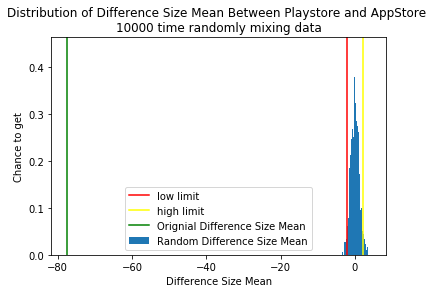

In [59]:
# Plots a graph to show the result of chance to get the original result 
plt.hist(difference, bins = 500, density = True, 
         label = 'Random Difference Size Mean')
plt.axvline(confidence_interval[0], color = 'red', 
               label = 'low limit')
plt.axvline(confidence_interval[1], color = 'yellow', 
               label = 'high limit')
plt.axvline(float(mean_size_difference), color = 'green', 
            label = 'Orignial Difference Size Mean')
plt.legend()
plt.xlabel('Difference Size Mean')
plt.ylabel('Chance to get')
plt.title('Distribution of Difference Size '
          + 'Mean Between Playstore and AppStore'
          + ' \n10000 time randomly mixing data')
plt.show()

#### Result:
Observed difference between Applications mean size between Google Play Store and Apple Store, about -77.599 MB, is statistically significant.

## Question 4:
What can we conclude about the mean size of applications on Google Play Store and Apple Store based on the dataset?

- Loops 10000 times. Each time get 100 random rows in each dataset to compute the mean size of that 100 rows then adds that mean value to the list of means for each dataset.

In [60]:
playstore_subdata_size_means = []
appstore_subdata_size_means = []

for i in range (10000):
    playstore_subdata_size_mean = float(
        shuffle(playstore_data_remove_size_outliers[["Size"]])[
            0:100].mean())
    
    appstore_subdata_size_mean = float(
        shuffle(appstore_data_remove_size_outliers[["Size"]])[
            0:100].mean())
    
    playstore_subdata_size_means.append(playstore_subdata_size_mean)
    appstore_subdata_size_means.append(appstore_subdata_size_mean)

#### Test to ensure the length of both lists of mean have lengths 10000 for further computations

In [61]:
assert(len(playstore_subdata_size_means) == 10000)
assert(len(appstore_subdata_size_means) == 10000)

- Computes the confidence interval for mean applications size on 2 datasets

In [63]:
# Computes the confidence interval for mean applications
# sizes on Google Play Store
playstore_confidence_interval = get_confidence_interval(
    playstore_subdata_size_means)

# Computes the confidence interval for mean applications
# sizes on Apple Store Store
appstore_confidence_interval = get_confidence_interval(
    appstore_subdata_size_means)

# prints the results
print("Google Play Store Applications mean size "
      + "with 95% confidence: \nfrom "
      + str(playstore_confidence_interval[0]) + " MB to "
      + str(playstore_confidence_interval[1]) + " MB.")
print()
print("Apple Store Applications mean size "
      + "with 95% confidence: \nfrom "
      + str(appstore_confidence_interval[0]) + " MB to "
      + str(appstore_confidence_interval[1]) + " MB.")

Google Play Store Applications mean size with 95% confidence: 
from 17.461566885638582 MB to 25.089413114361413 MB.

Apple Store Applications mean size with 95% confidence: 
from 83.9726300455412 MB to 113.63487396947346 MB.


#### Draws graphs to show the results computed above (95% confidence interval is from the low limit line to high limit line)

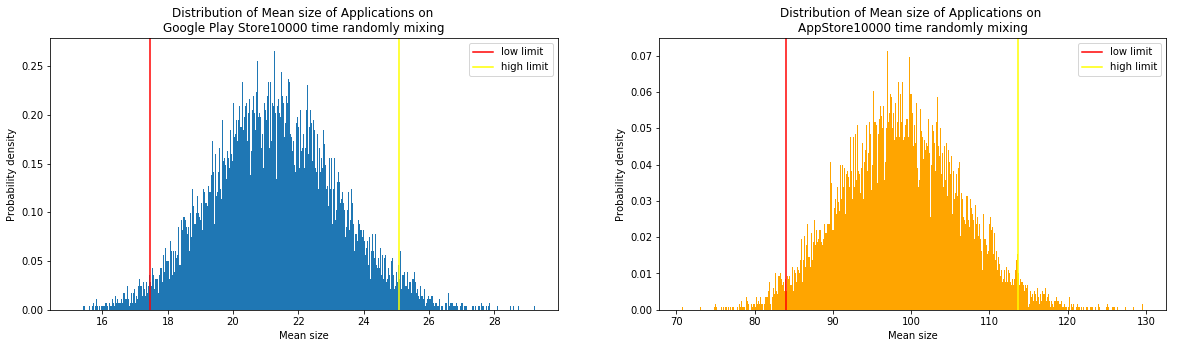

In [64]:
# Setups 2 graphs
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(5)

# plots graphs to show the result with the confidence interval on Google Play Store
axs[0].hist(playstore_subdata_size_means, bins= 500, 
            density = True)
axs[0].axvline(playstore_confidence_interval[0], color = 'red', 
               label = 'low limit')
axs[0].axvline(playstore_confidence_interval[1], color = 'yellow', 
               label = 'high limit')
axs[0].set_xlabel('Mean size')
axs[0].set_ylabel('Probability density')
axs[0].set_title('Distribution of Mean size of Applications '
                 + 'on \nGoogle Play Store'
                 + '10000 time randomly mixing')
axs[0].legend()

# plots graphs to show the result with the confidence interval on AppleStore
axs[1].hist(appstore_subdata_size_means, bins= 500, 
            density = True, color = 'orange')
axs[1].axvline(appstore_confidence_interval[0], color = 'red', 
               label = 'low limit')
axs[1].axvline(appstore_confidence_interval[1], color = 'yellow', 
               label = 'high limit')
axs[1].set_xlabel('Mean size')
axs[1].set_ylabel('Probability density')
axs[1].set_title('Distribution of Mean size of Applications on \nAppStore'
                 + '10000 time randomly mixing')
axs[1].legend()

plt.show()

#### Result:

- Google Play Store Applications mean size with 95% confidence: from about 17.4 MB to about 25.0 MB.
- Apple Store Applications mean size with 95% confidence: from about 84.0 MB to about 113.9 MB.

#### Visualize the distribution of Size

- Plots the graph to show the distribution of size in the 2 datasets

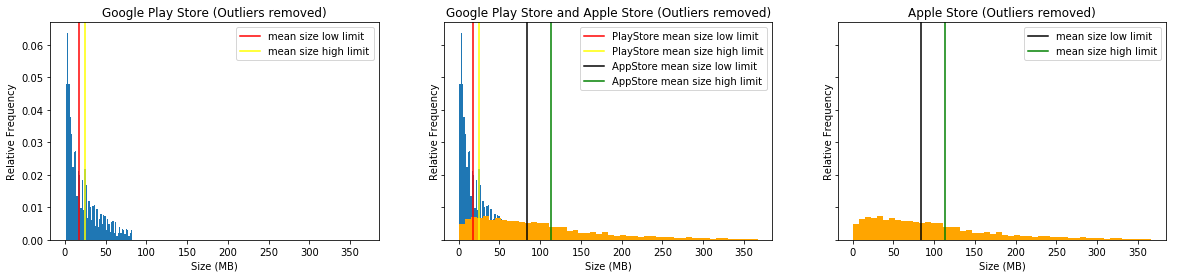

In [70]:
fig, axs = plt.subplots(1, 3, sharex = True, sharey=True)
fig.set_figwidth(20)

# Draws the graph of Google Play Store's Size - Relative Frequency
axs[0].hist(playstore_size_without_outliers.values, 
            bins= 50, density = True)
axs[0].axvline(playstore_confidence_interval[0], color = 'red', 
               label = 'mean size low limit')
axs[0].axvline(playstore_confidence_interval[1], color = 'yellow', 
               label = 'mean size high limit')
axs[0].legend()
axs[0].set_xlabel('Size (MB)')
axs[0].set_ylabel('Relative Frequency')
axs[0].set_title('Google Play Store (Outliers removed)')

# Draws the graph of Google Play Store and Apple Store's 
# Size - Relative Frequency
axs[1].hist(playstore_size_without_outliers.values, 
            bins= 50, density = True)
axs[1].hist(appstore_size_without_outliers.values, 
            bins = 50, density = True, 
            color = 'orange')
axs[1].axvline(playstore_confidence_interval[0], color = 'red', 
               label = 'PlayStore mean size low limit')
axs[1].axvline(playstore_confidence_interval[1], color = 'yellow', 
               label = 'PlayStore mean size high limit')
axs[1].axvline(appstore_confidence_interval[0], color = 'black', 
               label = 'AppStore mean size low limit')
axs[1].axvline(appstore_confidence_interval[1], color = 'green', 
               label = 'AppStore mean size high limit')
axs[1].legend()
axs[1].set_xlabel('Size (MB)')
axs[1].set_ylabel('Relative Frequency')
axs[1].set_title('Google Play Store and Apple Store (Outliers removed)')

# Draws the graph of Apple Store's Size - Relative Frequency
axs[2].hist(appstore_size_without_outliers.values, 
            bins = 50, density = True, 
            color = 'orange')
axs[2].axvline(appstore_confidence_interval[0], color = 'black', 
               label = 'mean size low limit')
axs[2].axvline(appstore_confidence_interval[1], color = 'green', 
               label = 'mean size high limit')
axs[2].legend()
axs[2].set_xlabel('Size (MB)')
axs[2].set_ylabel('Relative Frequency')
axs[2].set_title('Apple Store (Outliers removed)')

plt.show()

# Testing:

## Data pre-processing Testing:

[Test rows and NaN values GooglePlayStore](#Test-rows-and-NaN-values-GooglePlayStore)

[Test numerical values GooglePlayStore](#Test-numerical-values-GooglePlayStore)

[Test numerical values Apple Store](#Test-numerical-values-AppStore)

## Question 1 Testing:

### Correlation between "Installs" and another factor:

A [test](#Test-continuity-of-"Price":) to show that "Price" is continuous.

A [test](#Test-continuity-of-"Reviews":) to show that "Reviews" is continuous.

A [test](#Test-continuity-of-"Size":) to show "Size" is continuous.

A [test](#Test-continuity-of-"Rating":) to show "Rating" is categorical with normal distribution.

A [test](#Test-continuity-of-"Installs":) to show "Installs" is categorical.

All the [graphs](#Draws-graphs-to-show-the-result-above:) shows the linear regression lines have the slopes that similar to the results from Spearman Correlation Coefficients calculated above and the scatterplots represent the real data from the dataset also shows that the calculation is correct.

### Correlation between other pair of factors:

All the [graphs](#Plots-the-graphs-to-show-the-correlations-above:) shows the linear regression lines have the slopes that similar to the results from Pearson Correlation Coefficients calculated above and the scatterplots represent the real data from the dataset also shows that the calculation is correct.

## Question 2 Testing:

### Price and Installs' relationship:

The [graph](#Draws-the-graph-to-show-the-relationship-between-Reviews-and-Installs) shows the linear regression lines have the slopes that similar to the results from Pearson Correlation Coefficients calculated above. 
The scatterplot represents real data from the dataset and the regression line look similar shows that the calculation is correct.

### Rating and Installs' relationship and Rating and Reviews' relationship:

The [graph](#Draws-graphs-to-show-these-results:) shows the linear regression lines have the slopes that similar to the results from Pearson Correlation Coefficients calculated above. The scatterplot represents real data from the dataset and the regression line look similar shows that the calculation is correct.

## Question 3 Testing:

[Test](#Test-remove_outlier:) for "remove_outlier" function

[Test](#Test-get_confidence_interval) for "get_confidence_interval" function

## Question 4 Testing:

[Test](#Test-to-ensure-the-length-of-both-lists-of-mean-have-lengths-10000-for-further-computations) for lengths of both lists of mean has length 10000 for further computations (Confidence interval).